Mata Kuliah : **BigData & Data Mining(ST168)**

# Materi : Preprocessing Data (Tabular)

# Apa itu Preprocessing Data

Data yang telah kita kumpulkan baik dari sumber primer maupun sekunder cenderung "tidak bersih". "Tidak bersih" di sini berarti bahwa data tersebut masih terdapat noise, ada value yang hilang, adanya outlier, tidak konsisten, serta tidak berada dalam rentang yang sama. Hal tersebut dapat mempengaruhi hasil model. Oleh karena itu kita perlu untuk membersihkan data yang telah kita kumpulkan agar siap untuk digunakan membangun model.


**teks tebal**# 1. Noise
Noise adalah data-data yang tidak relevan yang tercampur ke dalam dataset. Salah satu sontoh noise yang bisa terjadi adalah adanya value string di kolom yang bertipe numerik.

# 2. Value yang Hilang
Dataset yang tersedia terkadang kehilangan beberapa valuenya. Hal ini akan ditandai dengan NaN atau null. Mengatasi value yang hilang ini sangat penting mengingat bahwa value yang hilang ini akan mengganggu pengembangan model.

# 3. Outlier (Pencilan)
Outlier sendiri merupakan value yang berada pada rentang yang sangat rendah atau sangat tinggi dibandingkan mayoritas value yang lain. Outlier ini akan mempengaruhi perhitungan statistik seperti rata-rata dan mengurangi performa model.

# 4. Tidak Konsisten
Ketidakkonsistenan data salah satunya terjadi pada tipe data string. Misalkan satu nama kota ditulis secara bervariasi, Jakarta memiliki beberapa penulisan seperti jakarta, JKT, atau Djakarta.

# 5. Data berada dalam skala yang berbeda
Data yang tercatat bisa berada dalam berbagai macam rentang. Satu kolom pada dataset bertipe numerik memiliki nilai terendah misalnya 0 dan nilai tertinggi misalnya 10.000. perbedaan yang terlalu jauh ini perlu dinormalisasikan ataupun distandarisasi agar memudahkan pengembangan model.

# 6. Mengubah Tipe Data
Beberapa algoritma machine learning secara khusus hanya memproses tipe data numerik misalnya algoritma berbasisi jarak seperti KNN dan DBSCAN, oleh karena itu bila ada tipe data yang bertipe objek, maka sebaiknya diubah (encoding) ke tipe data numerik. (Akan tetapi encoding ini opsional, jika kolom tidak relevan untuk digunakan pada model, kolom tersebut bisa didrop .)





# 1. Cleaning

## Value Yang Hilang

In [ ]:
df = {'NIM': ["23.11.5001", "23.11.5002", "23.11.5003", '23.11.5004', '23.11.5005', '23.11.5006', '23.11.5007', '23.11.5008', '23.11.5009', '23.11.5010'],
         'Nama': ['Rehan', 'Juan', 'Johan', 'Asta', 'Yuno', 'Jack', 'Yuni', 'Yanti', 'Esti', 'Asbun'],
         'Nilai' : [90, 79, 80, 70, 98, 89, 88, 76, 85, 87]}

In [ ]:
df['Nilai'][7] = None
df['Nilai'][4] = None

In [ ]:
df = pd.DataFrame(df)
df

,NIM,Nama,Nilai
0,23.11.5001,Rehan,90.0
1,23.11.5002,Juan,79.0
2,23.11.5003,Johan,80.0
3,23.11.5004,Asta,70.0
4,23.11.5005,Yuno,NaN
5,23.11.5006,Jack,89.0
6,23.11.5007,Yuni,88.0
7,23.11.5008,Yanti,NaN
8,23.11.5009,Esti,85.0
9,23.11.5010,Asbun,87.0


In [ ]:
df.isnull().sum()

,0
NIM,0
Nama,0
Nilai,2


In [ ]:
 df.describe()

,Nilai
count,8.00000
mean,83.50000
std,6.78233
min,70.00000
25%,79.75000
50%,86.00000
75%,88.25000
max,90.00000


In [ ]:
df['Nilai'] = df['Nilai'].fillna(df['Nilai'].mean())

In [ ]:
df.isnull().sum()

,0
NIM,0
Nama,0
Nilai,0


In [ ]:
df.describe()

,Nilai
count,10.000000
mean,83.500000
std,5.981453
min,70.000000
25%,80.875000
50%,84.250000
75%,87.750000
max,90.000000


Ada kasus lain di mana tipe data bertipe string yang hilang dan untuk menanganinya mirip seperti menangani data numerik yang hilang

In [ ]:
df = {'NIM': ["23.11.5001", "23.11.5002", "23.11.5003", '23.11.5004', '23.11.5005', '23.11.5006', '23.11.5007', '23.11.5008', '23.11.5009', '23.11.5010'],
         'Nama': ['Rehan', 'Juan', 'Johan', 'Asta', 'Yuno', 'Jack', 'Yuni', 'Yanti', 'Esti', 'Asbun'],
         'Nilai' : [90, 79, 80, 70, 98, 89, 88, 76, 85, 87],
      'Asal' : ['Medan', 'Pontianak', 'Medan', 'Semarang', 'Semarang', 'Pontianak', 'Medan','Bandung', 'Medan', 'Medan']}

In [ ]:
df['Asal'][7] = None
df['Asal'][4] = None

In [ ]:
df = pd.DataFrame(df)
df

,NIM,Nama,Nilai,Asal
0,23.11.5001,Rehan,90,Medan
1,23.11.5002,Juan,79,Pontianak
2,23.11.5003,Johan,80,Medan
3,23.11.5004,Asta,70,Semarang
4,23.11.5005,Yuno,98,None
5,23.11.5006,Jack,89,Pontianak
6,23.11.5007,Yuni,88,Medan
7,23.11.5008,Yanti,76,None
8,23.11.5009,Esti,85,Medan
9,23.11.5010,Asbun,87,Medan


In [ ]:
df.isna().sum()

,0
NIM,0
Nama,0
Nilai,0
Asal,2


In [ ]:
asal_banyak = df['Asal'].mode()[0]
asal_banyak

'Medan'

In [ ]:
df['Asal']= df['Asal'].fillna(asal_banyak)

In [ ]:
df

,NIM,Nama,Nilai,Asal
0,23.11.5001,Rehan,90,Medan
1,23.11.5002,Juan,79,Pontianak
2,23.11.5003,Johan,80,Medan
3,23.11.5004,Asta,70,Semarang
4,23.11.5005,Yuno,98,Medan
5,23.11.5006,Jack,89,Pontianak
6,23.11.5007,Yuni,88,Medan
7,23.11.5008,Yanti,76,Medan
8,23.11.5009,Esti,85,Medan
9,23.11.5010,Asbun,87,Medan


In [ ]:
df.isna().sum()

,0
NIM,0
Nama,0
Nilai,0
Asal,0


## Menangani Noise

In [ ]:
ditch = {'NIM': ["23.11.5001", "23.11.5002", "23.11.5003"],
         'Nama': ['Rehan', 'Juan', 'Johan'],
         'Nilai' : [90, 79, 'Donat']}

In [ ]:
import pandas as pd

ditch = pd.DataFrame(ditch)
ditch

,NIM,Nama,Nilai
0,23.11.5001,Rehan,90
1,23.11.5002,Juan,79
2,23.11.5003,Johan,Donat


In [ ]:
ditch["Nilai"]

,Nilai
0,90
1,79
2,Donat


In [ ]:
ditch["Nilai"] = ditch["Nilai"].replace('Donat', 80)

/tmp/ipython-input-583324257.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ditch["Nilai"] = ditch["Nilai"].replace('Donat', 80)


In [ ]:
ditch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NIM     3 non-null      object
 1   Nama    3 non-null      object
 2   Nilai   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


## Menangani Outlier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Praktikum Big Data dan Data Mining/heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

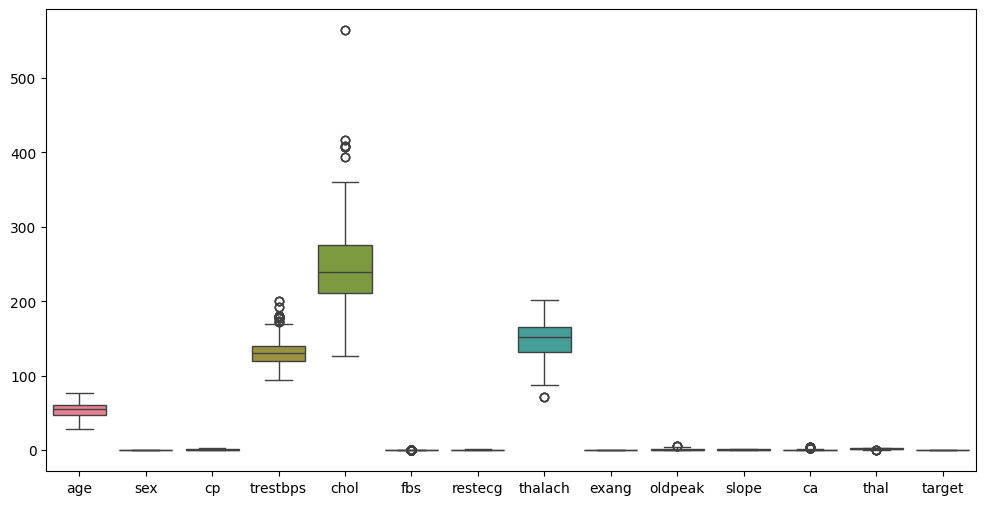

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
sns.boxplot(df)


In [ ]:
df1 = df.copy()

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + (1.5 * IQR)
batas_bawah = Q1 - (1.5 * IQR)

for col in df1.select_dtypes(include=np.number).columns:
  df1 = df1[(df1[col] <= batas_atas[col]) & (df1[col] >= batas_bawah[col])]


<Axes: >

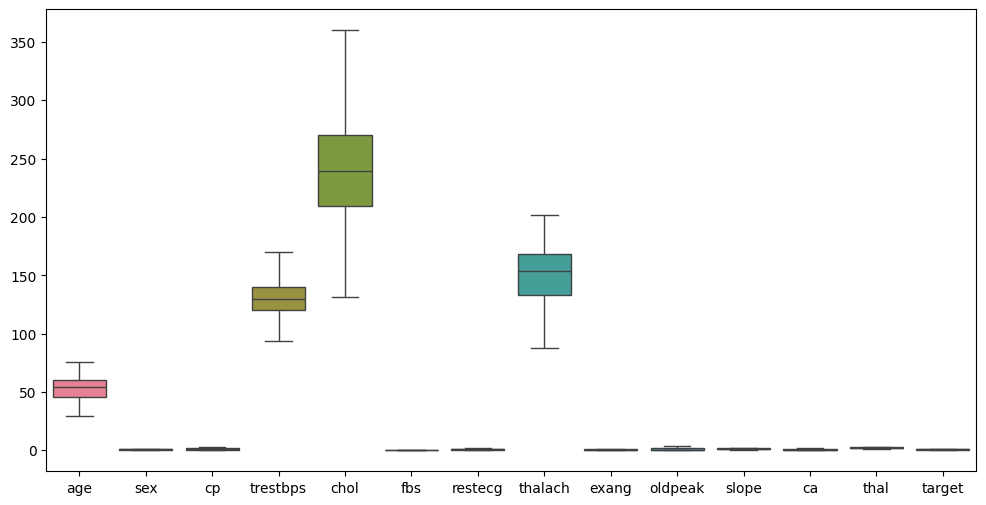

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df1)

In [ ]:
df2 = df.copy()

In [ ]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + (1.5 * IQR)
batas_bawah = Q1 - (1.5 * IQR)

for col in df2.select_dtypes(include=np.number).columns:
  df2[col] = df2[col].clip(lower=batas_bawah[col], upper=batas_atas[col])

<Axes: >

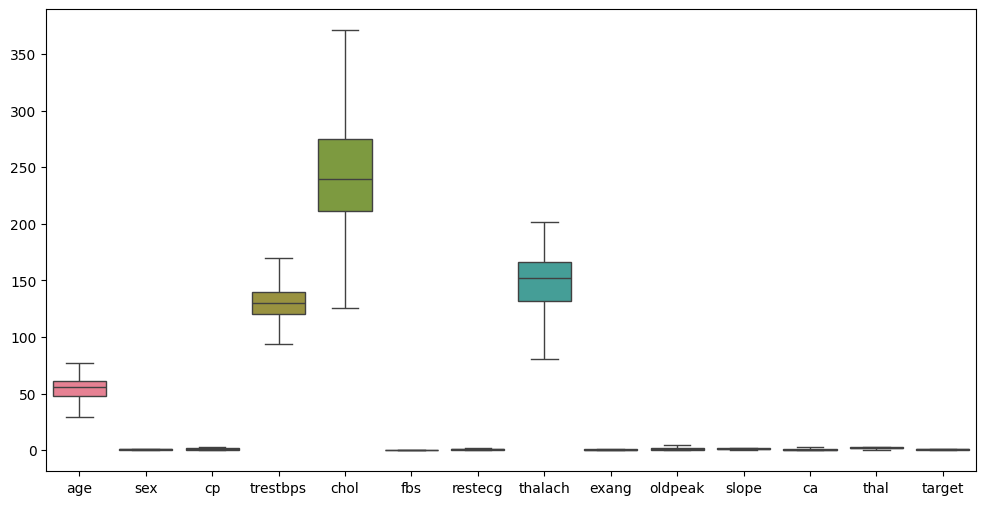

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df2)

## Menangani Data tidak Konsisten

In [ ]:
data = {'NIM': ["23.11.5001", "23.11.5002", "23.11.5003", '23.11.5004', '23.11.5005', '23.11.5006', '23.11.5007', '23.11.5008', '23.11.5009', '23.11.5010'],
         'Nama': ['Rehan', 'Juan', 'Johan', 'Asta', 'Yuno', 'Jack', 'Yuni', 'Yanti', 'Esti', 'Asbun'],
         'Nilai' : [90, 79, 80, 70, 98, 89, 88, 76, 85, 87],
      'Asal' : ['Jakarta', 'jakarta', 'JKT', 'jkt', 'Semarang', 'Pontianak', 'Medan','Bandung', 'Medan', 'Medan']}

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data

,NIM,Nama,Nilai,Asal
0,23.11.5001,Rehan,90,Jakarta
1,23.11.5002,Juan,79,jakarta
2,23.11.5003,Johan,80,JKT
3,23.11.5004,Asta,70,jkt
4,23.11.5005,Yuno,98,Semarang
5,23.11.5006,Jack,89,Pontianak
6,23.11.5007,Yuni,88,Medan
7,23.11.5008,Yanti,76,Bandung
8,23.11.5009,Esti,85,Medan
9,23.11.5010,Asbun,87,Medan


In [ ]:
data['Asal'].value_counts()

,count
Asal,
Medan,3
Jakarta,1
JKT,1
jakarta,1
jkt,1
Semarang,1
Pontianak,1
Bandung,1


In [ ]:
data['Asal'] = data['Asal'].replace(['jakarta','jkt','JKT'], 'Jakarta')

In [ ]:
data['Asal'].value_counts()

,count
Asal,
Jakarta,4
Medan,3
Semarang,1
Pontianak,1
Bandung,1


# 2. Data Tranformation

## Data Tidak dalam Rentang Yang Sama (Normalisasi dan Standarisasi)

In [ ]:
data_jantung = pd.read_csv('/content/drive/MyDrive/Praktikum Big Data dan Data Mining/heart.csv')
data_jantung.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data_jantung['chol'].describe()

,chol
count,1025.00000
mean,246.00000
std,51.59251
min,126.00000
25%,211.00000
50%,240.00000
75%,275.00000
max,564.00000


## Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data_jantung)

In [ ]:
df_scaled

array([[0.47916667, 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.25      , 0.66666667,
        0.        ],
       [0.4375    , 0.        , 0.        , ..., 0.        , 0.66666667,
        1.        ],
       [0.52083333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ]])

## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = scaler.fit_transform(data_jantung)

In [ ]:
df_standard

array([[-0.26843658,  0.66150409, -0.91575542, ...,  1.20922066,
         1.08985168, -1.02669772],
       [-0.15815703,  0.66150409, -0.91575542, ..., -0.73197147,
         1.08985168, -1.02669772],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -0.73197147,
         1.08985168, -1.02669772],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ...,  0.23862459,
        -0.52212231, -1.02669772],
       [-0.4889957 , -1.51170646, -0.91575542, ..., -0.73197147,
        -0.52212231,  0.97399651],
       [-0.04787747,  0.66150409, -0.91575542, ...,  0.23862459,
         1.08985168, -1.02669772]])

## Mengubah Tipe Data(Encoding)

In [ ]:
df = {'NIM': ["23.11.5001", "23.11.5002", "23.11.5003", '23.11.5004', '23.11.5005', '23.11.5006', '23.11.5007', '23.11.5008', '23.11.5009', '23.11.5010'],
         'Nama': ['Rehan', 'Juan', 'Johan', 'Asta', 'Yuno', 'Jack', 'Yuni', 'Yanti', 'Esti', 'Asbun'],
         'Jenis Kelamin' : ['Laki-Laki', 'Laki-Laki', 'Laki-Laki', 'Perempuan', 'Laki-Laki', 'Laki-Laki', 'Perempuan', 'Perempuan', 'Laki-Laki', 'Laki-Laki'],
         'Nilai' : [90, 79, 80, 70, 98, 89, 88, 76, 85, 87],
      'Asal' : ['Medan', 'Pontianak', 'Medan', 'Semarang', 'Semarang', 'Pontianak', 'Medan','Bandung', 'Medan', 'Medan']}

In [ ]:
Mahasiswa = pd.DataFrame(df)
Mahasiswa

,NIM,Nama,Jenis Kelamin,Nilai,Asal
0,23.11.5001,Rehan,Laki-Laki,90,Medan
1,23.11.5002,Juan,Laki-Laki,79,Pontianak
2,23.11.5003,Johan,Laki-Laki,80,Medan
3,23.11.5004,Asta,Perempuan,70,Semarang
4,23.11.5005,Yuno,Laki-Laki,98,Semarang
5,23.11.5006,Jack,Laki-Laki,89,Pontianak
6,23.11.5007,Yuni,Perempuan,88,Medan
7,23.11.5008,Yanti,Perempuan,76,Bandung
8,23.11.5009,Esti,Laki-Laki,85,Medan
9,23.11.5010,Asbun,Laki-Laki,87,Medan


In [ ]:
Mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NIM            10 non-null     object
 1   Nama           10 non-null     object
 2   Jenis Kelamin  10 non-null     object
 3   Nilai          10 non-null     int64 
 4   Asal           10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


In [ ]:
Mahasiswa['Jenis Kelamin'] = Mahasiswa['Jenis Kelamin'].map({'Laki-Laki' : 1, 'Perempuan' : 0})


In [ ]:
Mahasiswa

,NIM,Nama,Jenis Kelamin,Nilai,Asal
0,23.11.5001,Rehan,1,90,Medan
1,23.11.5002,Juan,1,79,Pontianak
2,23.11.5003,Johan,1,80,Medan
3,23.11.5004,Asta,0,70,Semarang
4,23.11.5005,Yuno,1,98,Semarang
5,23.11.5006,Jack,1,89,Pontianak
6,23.11.5007,Yuni,0,88,Medan
7,23.11.5008,Yanti,0,76,Bandung
8,23.11.5009,Esti,1,85,Medan
9,23.11.5010,Asbun,1,87,Medan


# Tugas
Berikut Dataset https://drive.google.com/file/d/11naeYdnVtUWZtdR0Uj878kIDEOmjddAG/view?usp=drive_link

Silahkan untuk melakukan Prepocessing seperi yang sudah dijelaskan, jangan lupa untuk menjelaskan setiap langkah yang kalian lakukan

INFO TAMBAHAN : Ini adalah Dataset penumpang kapal Titanic

Refrensi:
1. https://youtu.be/TzlvSDQ_NDE?si=l8XrsT0Dbo0avCE7
2. https://youtu.be/Jg7xqtIr5Tg?si=_y6rutdMBuCjmS4f
3. https://digitalskola.com/blog/data-science/data-preprocessing
4. https://mie.binus.ac.id/2022/08/26/teknik-pre-processing-dan-classification-dalam-data-science/
5. https://pandas.pydata.org/docs/